In [1]:
import os 
import sys
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches

from utils import plot_data

In [51]:
targets = {
    'halfcheetah': 12000,
    'hopper': 3600,
    'walker2d': 5000,
}
base = ['training/train_loss_mean']
renamed_cols = ['loss', 'return_norm', 'return']
data = {}
for env in ["halfcheetah", "hopper", "walker2d"]:
    for mode in ["medium", "medium-replay", "medium-expert"]:
        for algo in ["dt", "idm_full_adj_delayed"]:
            if env == 'halfcheetah':
                algo += '_12k'
            path = os.path.join("tmp", env, mode, algo)
            dfs = []
            for dir in os.listdir(path):
                run_data_path = os.path.join(path, dir, 'tensorboard', 'logs.csv')
                columns = base + [f'evaluation/target_{targets[env]}_return_mean', f'evaluation/target_{targets[env]}_return_mean_normalized']
                df = pd.read_csv(os.path.join(run_data_path))[columns]
                # rename cols 
                df.columns = renamed_cols
                df['name'] = f'{env}-{mode}-{algo}' 
                df.index = np.arange(len(df))
                df['timesteps'] = df.index * 1000
                dfs.append(df)
            df = pd.concat(dfs, axis=0)
            data[f'{env}-{mode}-{algo}'] = df

data.keys()

dict_keys(['halfcheetah-medium-dt_12k', 'halfcheetah-medium-idm_full_adj_delayed_12k', 'halfcheetah-medium-replay-dt_12k', 'halfcheetah-medium-replay-idm_full_adj_delayed_12k', 'halfcheetah-medium-expert-dt_12k', 'halfcheetah-medium-expert-idm_full_adj_delayed_12k', 'hopper-medium-dt', 'hopper-medium-idm_full_adj_delayed', 'hopper-medium-replay-dt', 'hopper-medium-replay-idm_full_adj_delayed', 'hopper-medium-expert-dt', 'hopper-medium-expert-idm_full_adj_delayed', 'walker2d-medium-dt', 'walker2d-medium-idm_full_adj_delayed', 'walker2d-medium-replay-dt', 'walker2d-medium-replay-idm_full_adj_delayed', 'walker2d-medium-expert-dt', 'walker2d-medium-expert-idm_full_adj_delayed'])

In [52]:
base_path = 'tmp/dd/'
for variant in os.listdir(base_path):
    path = os.path.join(base_path, variant)
    dfs = []
    for file in os.listdir(path):
        run_data_path = os.path.join(path, file)
        columns = base + [f'evaluation/target_3600_return_mean', f'evaluation/target_3600_return_mean_normalized']
        df = pd.read_csv(os.path.join(run_data_path))[columns]
        # rename cols 
        df.columns = renamed_cols
        df['name'] = f'dd-{variant}' 
        df.index = np.arange(len(df))
        df['timesteps'] = df.index * 1000
        dfs.append(df)
    df = pd.concat(dfs, axis=0)
    data[f'dd-{variant}'] = df
data.keys()

dict_keys(['halfcheetah-medium-dt_12k', 'halfcheetah-medium-idm_full_adj_delayed_12k', 'halfcheetah-medium-replay-dt_12k', 'halfcheetah-medium-replay-idm_full_adj_delayed_12k', 'halfcheetah-medium-expert-dt_12k', 'halfcheetah-medium-expert-idm_full_adj_delayed_12k', 'hopper-medium-dt', 'hopper-medium-idm_full_adj_delayed', 'hopper-medium-replay-dt', 'hopper-medium-replay-idm_full_adj_delayed', 'hopper-medium-expert-dt', 'hopper-medium-expert-idm_full_adj_delayed', 'walker2d-medium-dt', 'walker2d-medium-idm_full_adj_delayed', 'walker2d-medium-replay-dt', 'walker2d-medium-replay-idm_full_adj_delayed', 'walker2d-medium-expert-dt', 'walker2d-medium-expert-idm_full_adj_delayed', 'dd-single_dec', 'dd-single_dec_gate', 'dd-vr', 'dd-vr_gate', 'dd-vr_single_dec', 'dd-vr_single_dec_gate'])

In [53]:
halfcheetah_frames = [df for name, df in data.items() if name in ['halfcheetah-medium-dt_12k', 'halfcheetah-medium-idm_full_adj_delayed_12k',
                                                                   'halfcheetah-medium-replay-dt_12k', 'halfcheetah-medium-replay-idm_full_adj_delayed_12k',
                                                                   'halfcheetah-medium-expert-dt_12k', 'halfcheetah-medium-expert-idm_full_adj_delayed_12k']]
halfcheetah_frames_medium = [df for name, df in data.items() if name in ['halfcheetah-medium-dt_12k', 'halfcheetah-medium-idm_full_adj_delayed_12k']]
halfcheetah_frames_replay = [df for name, df in data.items() if name in ['halfcheetah-medium-replay-dt_12k', 'halfcheetah-medium-replay-idm_full_adj_delayed_12k']]
halfcheetah_frames_expert = [df for name, df in data.items() if name in ['halfcheetah-medium-expert-dt_12k', 'halfcheetah-medium-expert-idm_full_adj_delayed_12k']]    
hopper_frames = [df for name, df in data.items() if name in ['hopper-medium-dt', 'hopper-medium-idm_full_adj_delayed',
                                                             'hopper-medium-replay-dt', 'hopper-medium-replay-idm_full_adj_delayed',
                                                             'hopper-medium-expert-dt', 'hopper-medium-expert-idm_full_adj_delayed']]
hopper_frames_medium = [df for name, df in data.items() if name in ['hopper-medium-dt', 'hopper-medium-idm_full_adj_delayed']]
hopper_frames_replay = [df for name, df in data.items() if name in ['hopper-medium-replay-dt', 'hopper-medium-replay-idm_full_adj_delayed']]
hopper_frames_expert = [df for name, df in data.items() if name in ['hopper-medium-expert-dt', 'hopper-medium-expert-idm_full_adj_delayed']]
walker_frames = [df for name, df in data.items() if name in ['walker2d-medium-dt', 'walker2d-medium-idm_full_adj_delayed',
                                                             'walker2d-medium-replay-dt', 'walker2d-medium-replay-idm_full_adj_delayed',
                                                             'walker2d-medium-expert-dt', 'walker2d-medium-expert-idm_full_adj_delayed']]
walker_frames_medium = [df for name, df in data.items() if name in ['walker2d-medium-dt', 'walker2d-medium-idm_full_adj_delayed']]
walker_frames_replay = [df for name, df in data.items() if name in ['walker2d-medium-replay-dt', 'walker2d-medium-replay-idm_full_adj_delayed']]
walker_frames_expert = [df for name, df in data.items() if name in ['walker2d-medium-expert-dt', 'walker2d-medium-expert-idm_full_adj_delayed']]

dd_frames = [df for name, df in data.items() if name.startswith('dd')] 
dd_frames.append(data['hopper-medium-replay-idm_full_adj_delayed'])


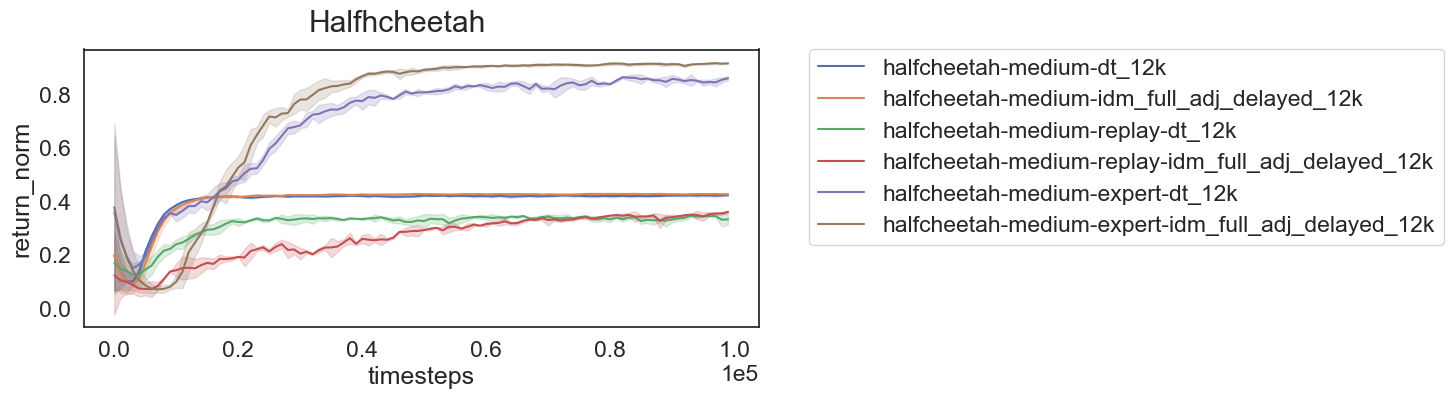

In [113]:
alpha = 0.4
fig, axs = plt.subplots(1, 1, figsize=(8,4))
plot_data(halfcheetah_frames, xaxis='timesteps', value=renamed_cols[1], condition='name', alpha=alpha, ax=axs)
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs.get_legend().remove()  
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, .91))
fig.suptitle("Halfhcheetah")
fig.subplots_adjust(top=0.88)

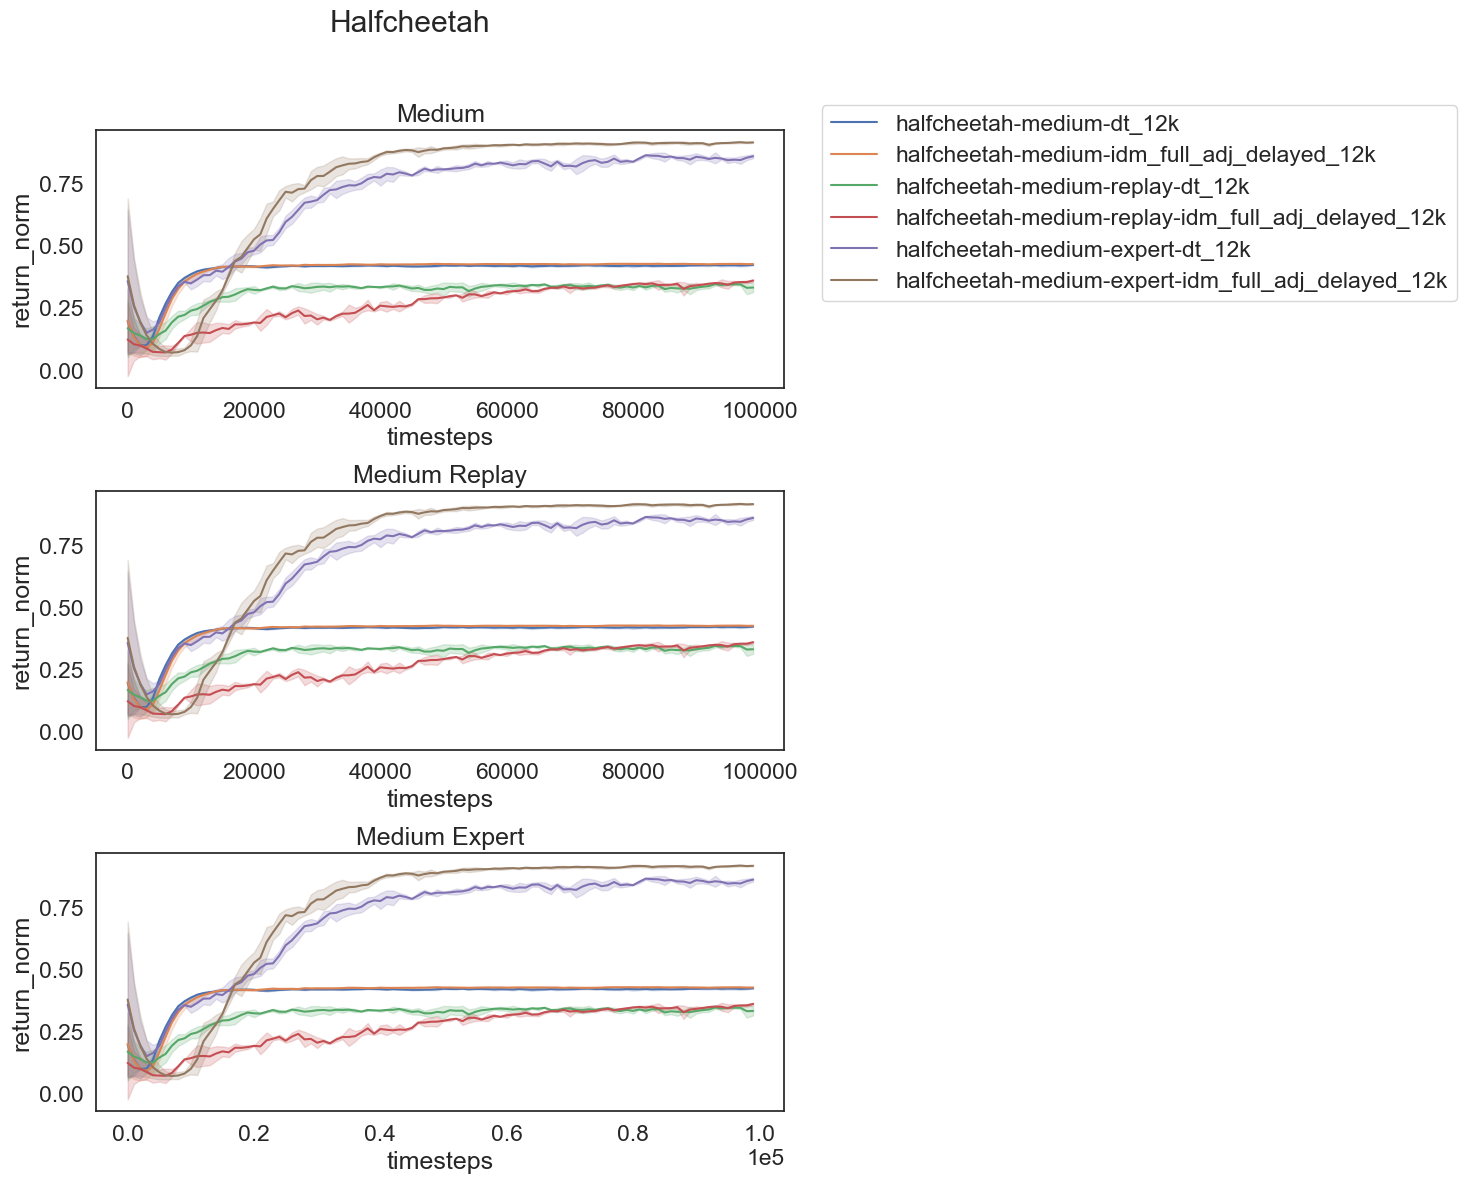

In [115]:
alpha = 0.4
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Assuming halfcheetah_frames contains data for each setup
setups = ['medium', 'medium-replay', 'medium-expert']
titles = ['Medium', 'Medium Replay', 'Medium Expert']

for i, setup in enumerate(setups):
    plot_data(halfcheetah_frames, xaxis='timesteps', value=renamed_cols[1], condition='name', alpha=alpha, ax=axs[i])
    axs[i].set_title(titles[i])

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(handles), bbox_to_anchor=(0.5, 1.05))
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, .91))

for ax in axs:
    ax.get_legend().remove()

fig.suptitle("Halfcheetah")
fig.subplots_adjust(top=0.88, hspace=0.4)


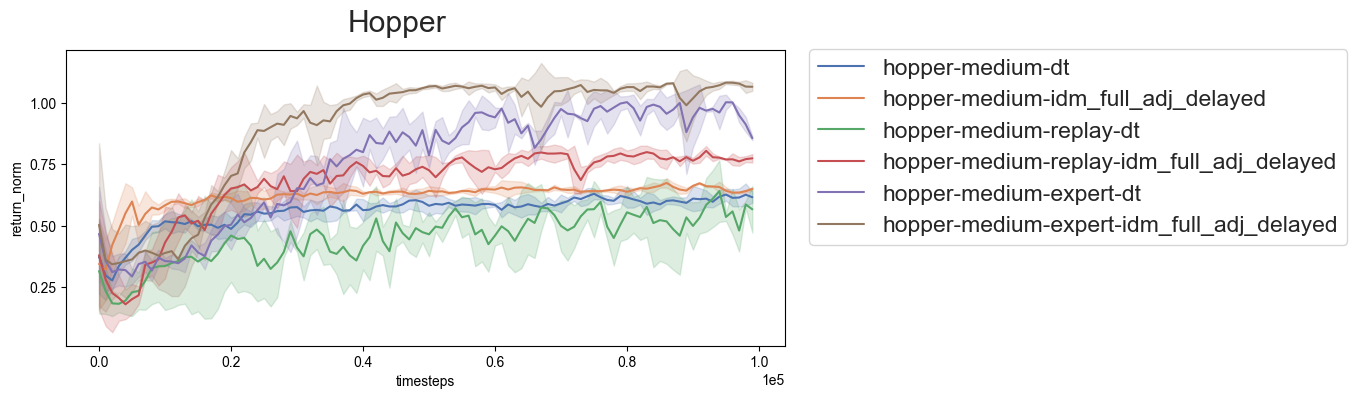

In [5]:
alpha = 0.4
fig, axs = plt.subplots(1, 1, figsize=(8,4))
plot_data(hopper_frames, xaxis='timesteps', value=renamed_cols[1], condition='name', alpha=alpha, ax=axs)
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs.get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, .91))
fig.suptitle("Hopper")
fig.subplots_adjust(top=0.88)

In [54]:
# Hopper medium, single plot 
name_mapping_dd_frames = {
    'hopper-medium-dt': 'DT',
    'hopper-medium-replay-idm_full_adj_delayed': 'Gate',
    'dd-single_dec': 'Single_Dec',
    'dd-single_dec_gate': 'Single_Dec_Gate',
    'dd-vr': 'VR',
    'dd-vr_gate': 'VR_Gate',
    'dd-vr_single_dec': 'VR_Single_Dec',
    'dd-vr_single_dec_gate': 'VR_Single_Dec_Gate',
}
# change name of list of dataframes
for df in dd_frames:
    df['name'] = df['name'].map(name_mapping_dd_frames)


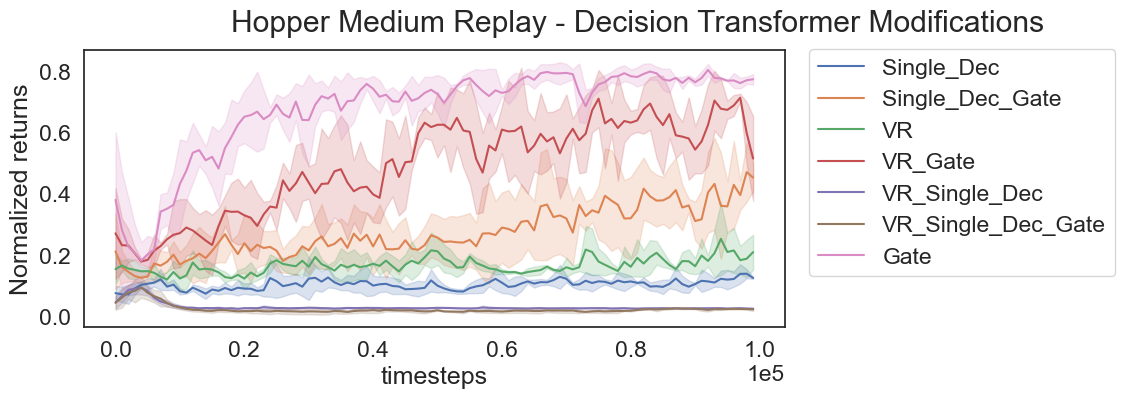

In [55]:
alpha = 0.4
fig, axs = plt.subplots(1, 1, figsize=(8,4))
plot_data(dd_frames, xaxis='timesteps', value=renamed_cols[1], condition='name', alpha=alpha, ax=axs)
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs.get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, .91))
axs.set_ylabel("Normalized returns")
fig.suptitle("Hopper Medium Replay - Decision Transformer Modifications", x=.8)
fig.subplots_adjust(top=0.88)

In [46]:
# Hopper medium, single plot 
name_mapping_hopper_medium = {
    'hopper-medium-dt': 'DT',
    'hopper-medium-idm_full_adj_delayed': 'Transformer_Gated',
}
# change name of list of dataframes
for df in hopper_frames_medium:
    df['name'] = df['name'].map(name_mapping_empty)


Text(0.5, 1.05, 'Hopper Medium')

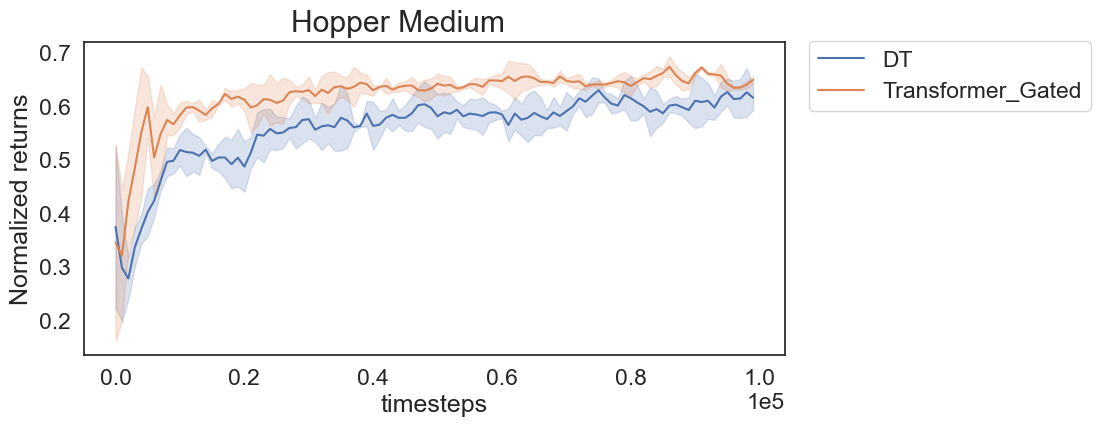

In [47]:
alpha = 0.4
fig, axs = plt.subplots(1, 1, figsize=(8,4))
plot_data(hopper_frames_medium, xaxis='timesteps', value=renamed_cols[1], condition='name', alpha=alpha, ax=axs, legend=True)
# rename y axis to "Normalized returns"
axs.set_ylabel("Normalized returns")
# remove legend title 
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs.get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
fig.suptitle("Hopper Medium", y=1.05)

In [64]:
# Hopper medium replay 
name_mapping_hopper_medium_replay = {
    'hopper-medium-replay-dt': 'DT',
    'hopper-medium-replay-idm_full_adj_delayed': 'Transformer_Gated',
}
# change name of list of dataframes
for df in hopper_frames_replay:
    df['name'] = df['name'].map(name_mapping_hopper_medium_replay)

Text(0.5, 1.05, 'Hopper Medium-Replay')

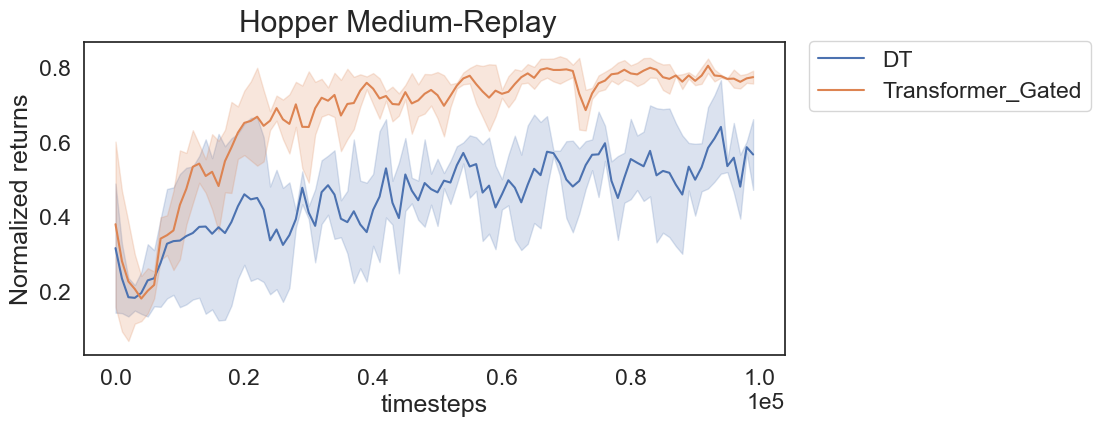

In [66]:

alpha = 0.4
fig, axs = plt.subplots(1, 1, figsize=(8,4))
plot_data(hopper_frames_replay, xaxis='timesteps', value=renamed_cols[1], condition='name', alpha=alpha, ax=axs, legend=True)
# rename y axis to "Normalized returns"
axs.set_ylabel("Normalized returns")
# remove legend title 
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs.get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
fig.suptitle("Hopper Medium-Replay", y=1.05)

In [89]:
# Hopper medium expert 
name_mapping_hopper_medium_expert = {
    'hopper-medium-expert-dt': 'DT',
    'hopper-medium-expert-idm_full_adj_delayed': 'Transformer_Gated',
}
# change name of list of dataframes
for df in hopper_frames_expert:
    df['name'] = df['name'].map(name_mapping_hopper_medium_expert)

Text(0.5, 1.05, 'Hopper Expert')

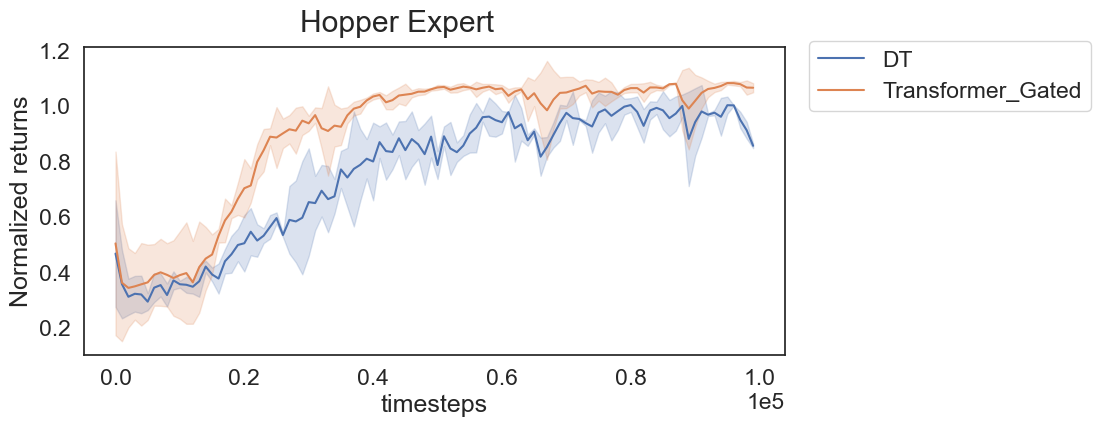

In [92]:
alpha = 0.4
fig, axs = plt.subplots(1, 1, figsize=(8,4))
plot_data(hopper_frames_expert, xaxis='timesteps', value=renamed_cols[1], condition='name', alpha=alpha, ax=axs, legend=True)
# rename y axis to "Normalized returns"
axs.set_ylabel("Normalized returns")
# remove legend title 
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs.get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
fig.suptitle("Hopper Expert", y=1.05)

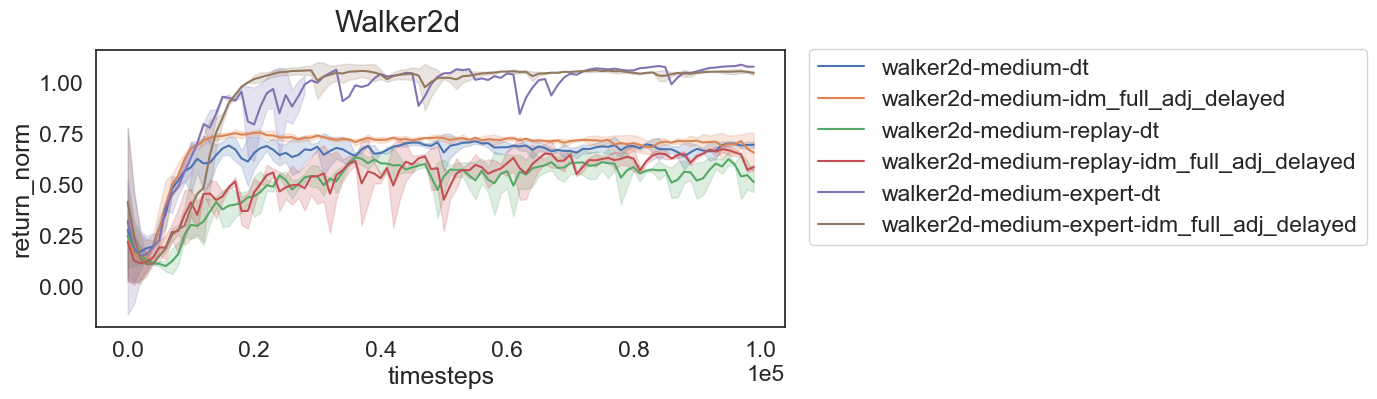

In [109]:
alpha = 0.4
fig, axs = plt.subplots(1, 1, figsize=(8,4))
plot_data(walker_frames, xaxis='timesteps', value=renamed_cols[1], condition='name', alpha=alpha, ax=axs)
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs.get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, .91))
fig.suptitle("Walker2d")
fig.subplots_adjust(top=0.88)

In [84]:
# Walker medium, single plot
name_mapping_walker_medium = {
    'walker2d-medium-dt': 'DT',
    'walker2d-medium-idm_full_adj_delayed': 'Transformer_Gated',
}
# change name of list of dataframes
for df in walker_frames_medium:
    df['name'] = df['name'].map(name_mapping_walker_medium)

Text(0.5, 1.05, 'Walker2d Medium')

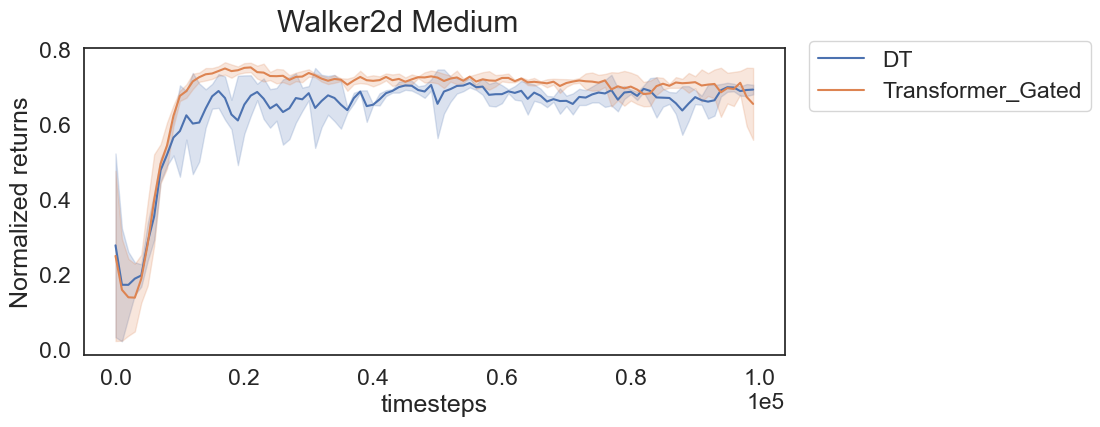

In [93]:
alpha = 0.4
fig, axs = plt.subplots(1, 1, figsize=(8,4))
plot_data(walker_frames_medium, xaxis='timesteps', value=renamed_cols[1], condition='name', alpha=alpha, ax=axs, legend=True)
# rename y axis to "Normalized returns"
axs.set_ylabel("Normalized returns")
# remove legend title 
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs.get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
fig.suptitle("Walker2d Medium", y=1.05)

In [86]:
# Walker medium-replay, single plot
name_mapping_walker_medium_replay = {
    'walker2d-medium-replay-dt': 'DT',
    'walker2d-medium-replay-idm_full_adj_delayed': 'Transformer_Gated',
}
# change name of list of dataframes
for df in walker_frames_replay:
    df['name'] = df['name'].map(name_mapping_walker_medium_replay)

Text(0.5, 1.05, 'Walker2d Medium-Replay')

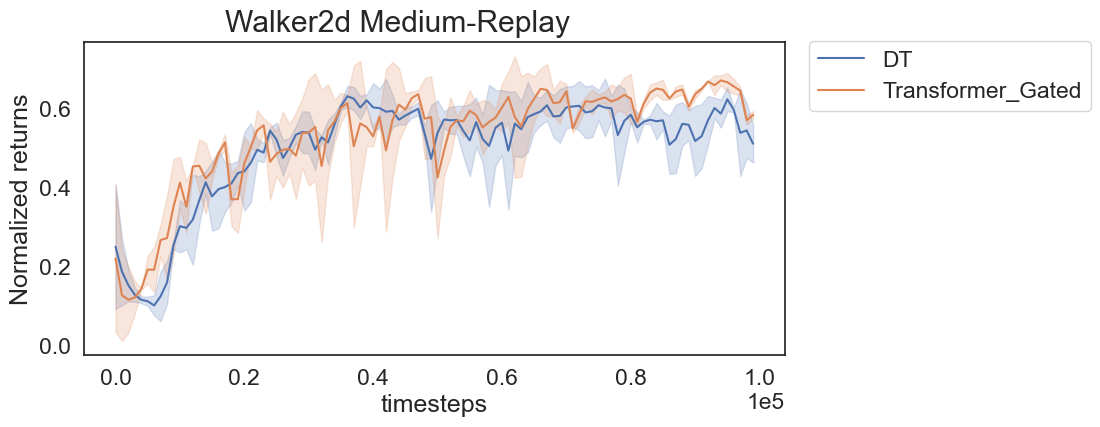

In [87]:
alpha = 0.4
fig, axs = plt.subplots(1, 1, figsize=(8,4))
plot_data(walker_frames_replay, xaxis='timesteps', value=renamed_cols[1], condition='name', alpha=alpha, ax=axs, legend=True)
# rename y axis to "Normalized returns"
axs.set_ylabel("Normalized returns")
# remove legend title 
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs.get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
fig.suptitle("Walker2d Medium-Replay", y=1.05)

In [94]:
# Walker medium-expert, single plot
name_mapping_walker_medium_expert = {
    'walker2d-medium-expert-dt': 'DT',
    'walker2d-medium-expert-idm_full_adj_delayed': 'Transformer_Gated',
}
# change name of list of dataframes
for df in walker_frames_expert:
    df['name'] = df['name'].map(name_mapping_walker_medium_expert)

Text(0.5, 1.05, 'Walker2d Expert')

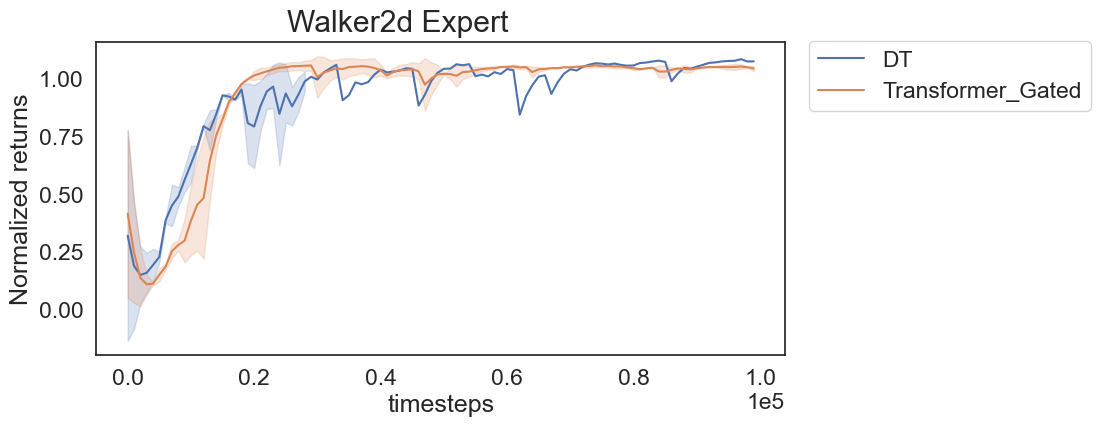

In [96]:
alpha = 0.4
fig, axs = plt.subplots(1, 1, figsize=(8,4))
plot_data(walker_frames_expert, xaxis='timesteps', value=renamed_cols[1], condition='name', alpha=alpha, ax=axs, legend=True)
# rename y axis to "Normalized returns"
axs.set_ylabel("Normalized returns")
# remove legend title 
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs.get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
fig.suptitle("Walker2d Expert", y=1.05)

In [102]:
# Halfcheetah medium, single plot
name_mapping_halfcheetah_medium = {
    'halfcheetah-medium-dt_12k': 'DT',
    'halfcheetah-medium-idm_full_adj_delayed_12k': 'Transformer_Gated',
}
# change name of list of dataframes
for df in halfcheetah_frames_medium:
    df['name'] = df['name'].map(name_mapping_halfcheetah_medium)

Text(0.5, 1.05, 'Halfcheetah Medium')

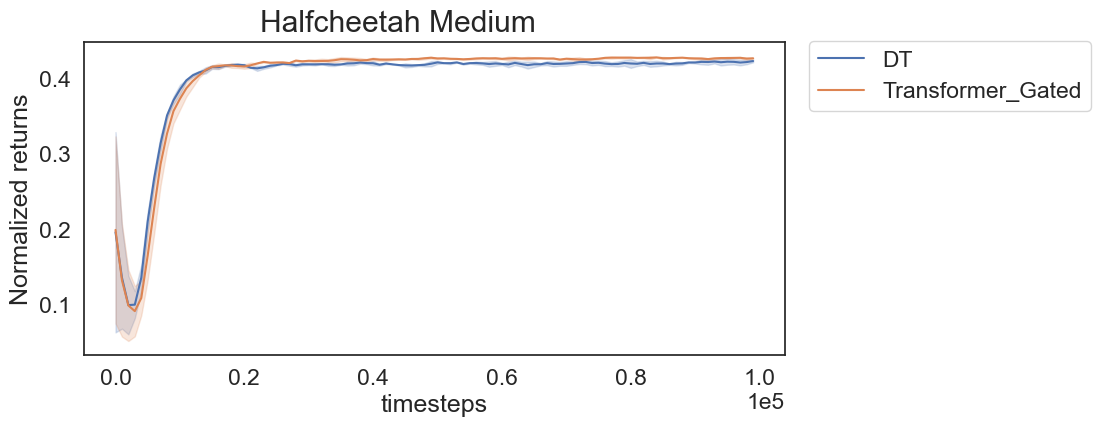

In [104]:
alpha = 0.4
fig, axs = plt.subplots(1, 1, figsize=(8,4))
plot_data(halfcheetah_frames_medium, xaxis='timesteps', value=renamed_cols[1], condition='name', alpha=alpha, ax=axs, legend=True)
# rename y axis to "Normalized returns"
axs.set_ylabel("Normalized returns")
# remove legend title 
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs.get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
fig.suptitle("Halfcheetah Medium", y=1.05)

In [105]:
# Halfcheetah medium-replay, single plot
name_mapping_halfcheetah_medium_replay = {
    'halfcheetah-medium-replay-dt_12k': 'DT',
    'halfcheetah-medium-replay-idm_full_adj_delayed_12k': 'Transformer_Gated',
}
# change name of list of dataframes
for df in halfcheetah_frames_replay:
    df['name'] = df['name'].map(name_mapping_halfcheetah_medium_replay)

Text(0.5, 1.05, 'Halfcheetah Medium-Replay')

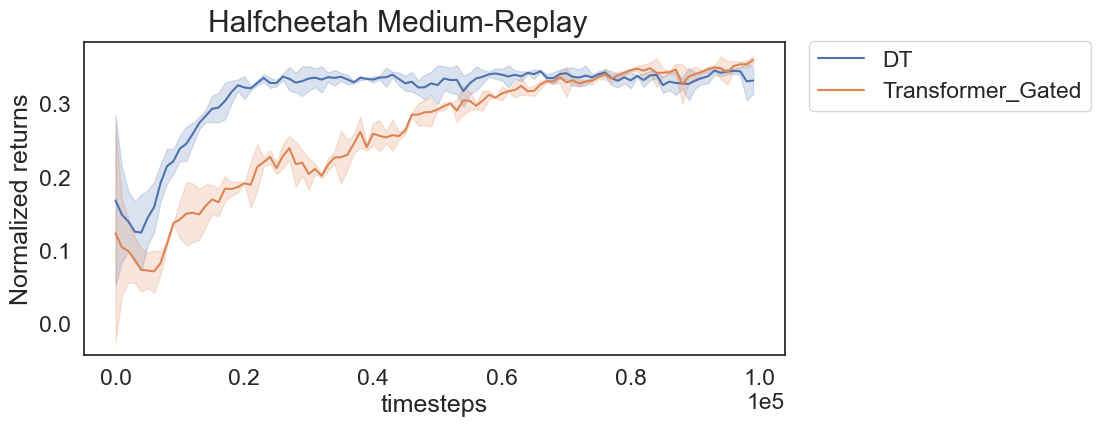

In [106]:
alpha = 0.4
fig, axs = plt.subplots(1, 1, figsize=(8,4))
plot_data(halfcheetah_frames_replay, xaxis='timesteps', value=renamed_cols[1], condition='name', alpha=alpha, ax=axs, legend=True)
# rename y axis to "Normalized returns"
axs.set_ylabel("Normalized returns")
# remove legend title 
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs.get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
fig.suptitle("Halfcheetah Medium-Replay", y=1.05)

In [107]:
# Halfcheetah medium-expert, single plot
name_mapping_halfcheetah_medium_expert = {
    'halfcheetah-medium-expert-dt_12k': 'DT',
    'halfcheetah-medium-expert-idm_full_adj_delayed_12k': 'Transformer_Gated',
}
# change name of list of dataframes
for df in halfcheetah_frames_expert:
    df['name'] = df['name'].map(name_mapping_halfcheetah_medium_expert)

Text(0.5, 1.05, 'Halfcheetah Expert')

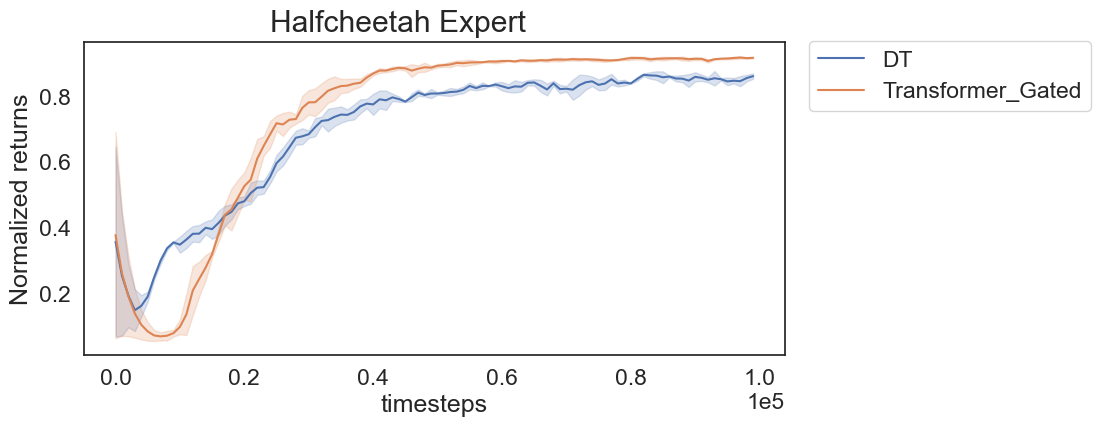

In [111]:
alpha = 0.4
fig, axs = plt.subplots(1, 1, figsize=(8,4))
plot_data(halfcheetah_frames_expert, xaxis='timesteps', value=renamed_cols[1], condition='name', alpha=alpha, ax=axs, legend=True)
# rename y axis to "Normalized returns"
axs.set_ylabel("Normalized returns")
# remove legend title 
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs.get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
fig.suptitle("Halfcheetah Expert", y=1.05)